# PROBLEM STATEMENT - Churn Prediction for a Telecommunication Brand .

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [170]:
# Load the dataset
Telco_df = pd.read_csv('Telco-Customer-Churn.csv')

In [171]:
print(Telco_df.head())  # Display the first few rows

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [172]:
print (Telco_df.shape)
Telco_df.isnull().sum()

(7043, 21)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [173]:
print(Telco_df.info())  # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [174]:
# Check for duplicate rows
Telco_df.duplicated().sum()

0

# VISUALIZATION

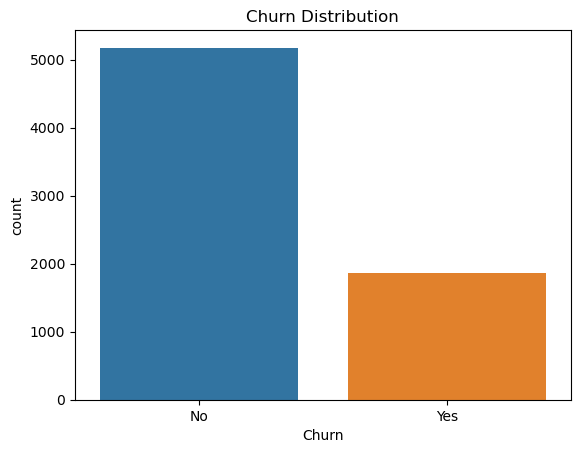

In [175]:
# Visualization 1: Churn distribution
sns.countplot(x='Churn', data=Telco_df)
plt.title('Churn Distribution')
plt.show()

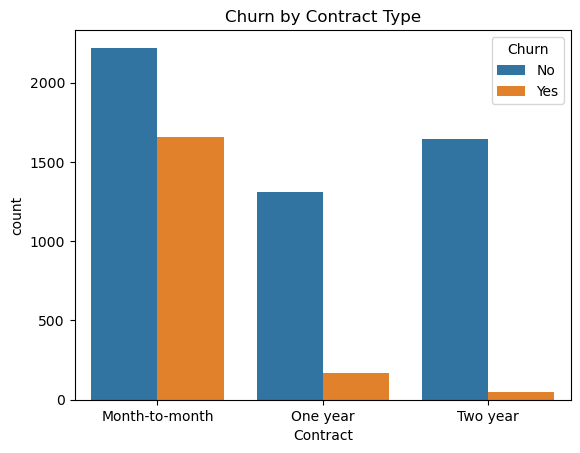

In [176]:
# Visualization 2: Churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=Telco_df)
plt.title('Churn by Contract Type')
plt.show()

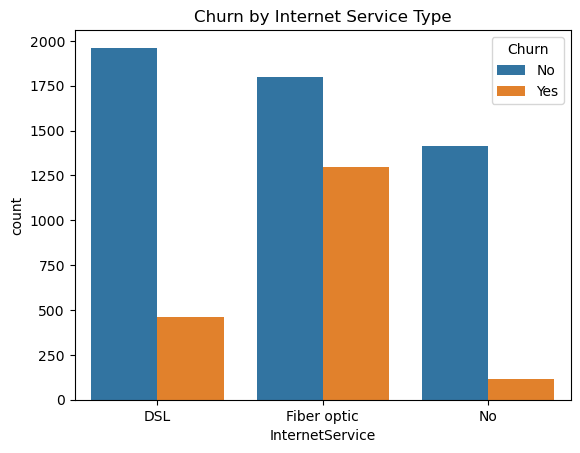

In [177]:
# Visualization 3: Churn by Internet Service type
sns.countplot(x='InternetService', hue='Churn', data=Telco_df)
plt.title('Churn by Internet Service Type')
plt.show()

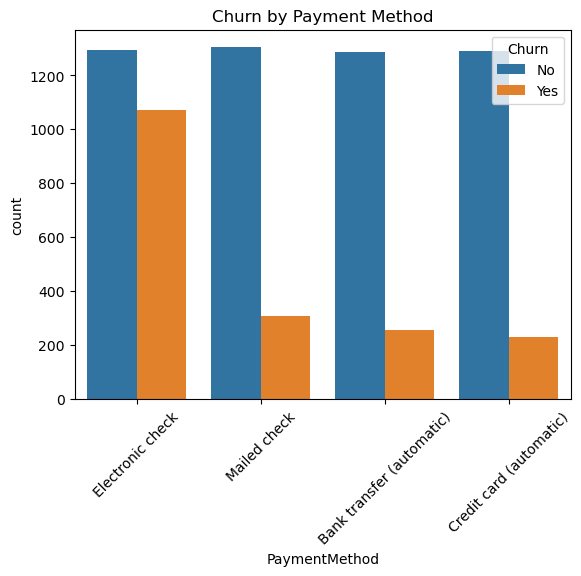

In [178]:
# Visualization 4: Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=Telco_df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

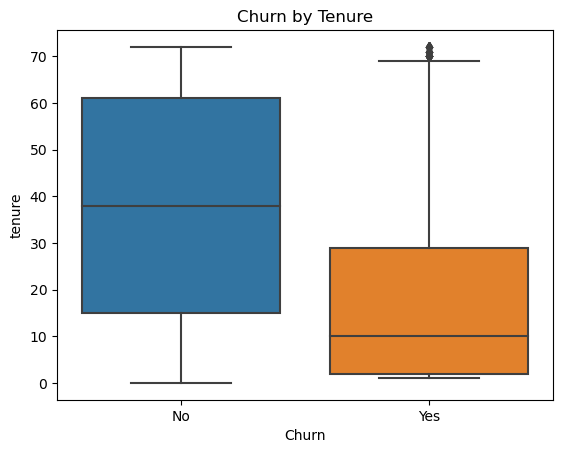

In [179]:
# Visualization 5: Churn by Tenure
sns.boxplot(x='Churn', y='tenure', data=Telco_df)
plt.title('Churn by Tenure')
plt.show()

so we are not taking any action to handle the outliers,because a customer can be in the company for many months.
Even though the customer had been in the company for a long time, we should consider them as part of our analysis.

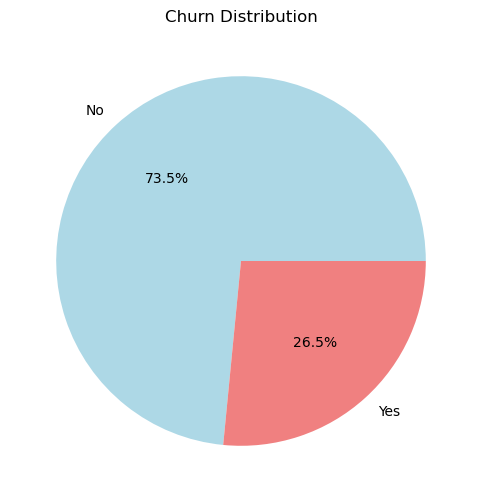

In [180]:
# 6. Pie chart for churn distribution
plt.figure(figsize=(6, 6))
plt.pie(Telco_df['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()

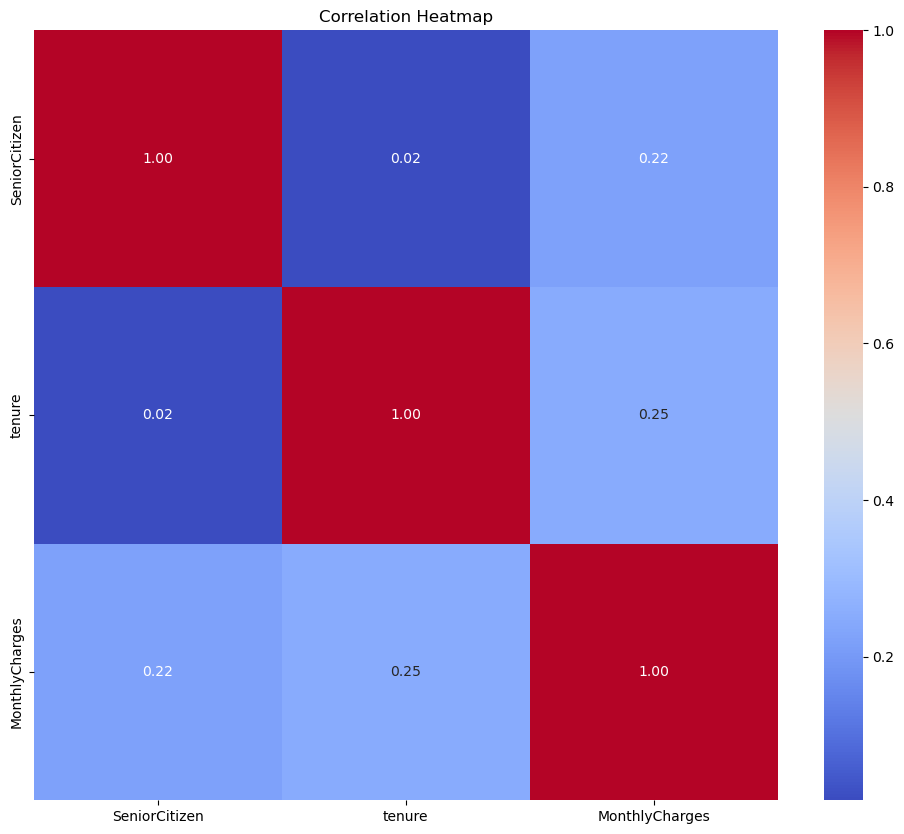

In [181]:
# Visualization 7: Correlation Heatmap
correlation_matrix = Telco_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# DATA CLEANING

In [182]:
# Assuming 'No internet service' means the customer does not have that service, we can fill those with 'No'
cols_fillna = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies']
Telco_df[cols_fillna] = Telco_df[cols_fillna].replace('No internet service', 'No')

In [183]:
# Assuming 'No internet service' means the customer does not have that service, we can fill those with 'No'
cols_fillna = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies']
Telco_df[cols_fillna] = Telco_df[cols_fillna].replace('No phone service', 'No')

In [184]:
Telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [185]:
# Drop irrelevant columns like customerID as it does not contribute to the prediction
Telco_df.drop(columns=['customerID'], inplace=True)

# Feature Engineering

In [186]:
# Convert 'Churn' column to binary values
Telco_df['Churn'] = Telco_df['Churn'].map({'Yes': 1, 'No': 0})


In [187]:
# Create binary features for 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
Telco_df['Partner'] = Telco_df['Partner'].map({'Yes': 1, 'No': 0})
Telco_df['Dependents'] = Telco_df['Dependents'].map({'Yes': 1, 'No': 0})
Telco_df['PhoneService'] = Telco_df['PhoneService'].map({'Yes': 1, 'No': 0})
Telco_df['PaperlessBilling'] = Telco_df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [188]:
Telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,No,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [189]:
Telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,No,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [190]:
Telco_df = pd.get_dummies(Telco_df, columns=['gender', 'MultipleLines', 'InternetService',
                                            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                            'TechSupport', 'StreamingTV', 'StreamingMovies',
                                            'Contract'], drop_first=True)

In [191]:
Telco_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,1,0,1,Electronic check,29.85,29.85,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,0,Mailed check,56.95,1889.5,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,2,1,1,Mailed check,53.85,108.15,1,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,0,...,0,0,1,0,1,1,0,0,1,0
4,0,0,0,2,1,1,Electronic check,70.70,151.65,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,Mailed check,84.80,1990.5,0,...,0,0,1,0,1,1,1,1,1,0
7039,0,1,1,72,1,1,Credit card (automatic),103.20,7362.9,0,...,1,0,0,1,1,0,1,1,1,0
7040,0,1,1,11,0,1,Electronic check,29.60,346.45,0,...,0,0,1,0,0,0,0,0,0,0
7041,1,1,0,4,1,1,Mailed check,74.40,306.6,1,...,1,0,0,0,0,0,0,0,0,0


In [192]:
# Convert TotalCharges to numeric 
Telco_df['TotalCharges'] = pd.to_numeric(Telco_df['TotalCharges'], errors='coerce')

In [193]:
#calculate the ratio of MonthlyCharges to TotalCharges to see the average monthly spending:
Telco_df['AvgMonthlySpending'] = Telco_df['TotalCharges'] / Telco_df['tenure']

In [194]:
Telco_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,AvgMonthlySpending
0,0,1,0,1,0,1,Electronic check,29.85,29.85,0,...,0,0,1,0,0,0,0,0,0,29.850000
1,0,0,0,34,1,0,Mailed check,56.95,1889.50,0,...,0,1,0,1,0,0,0,1,0,55.573529
2,0,0,0,2,1,1,Mailed check,53.85,108.15,1,...,0,1,1,0,0,0,0,0,0,54.075000
3,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,0,...,0,1,0,1,1,0,0,1,0,40.905556
4,0,0,0,2,1,1,Electronic check,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,Mailed check,84.80,1990.50,0,...,0,1,0,1,1,1,1,1,0,82.937500
7039,0,1,1,72,1,1,Credit card (automatic),103.20,7362.90,0,...,0,0,1,1,0,1,1,1,0,102.262500
7040,0,1,1,11,0,1,Electronic check,29.60,346.45,0,...,0,1,0,0,0,0,0,0,0,31.495455
7041,1,1,0,4,1,1,Mailed check,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,76.650000


# Feature Scaling

In [195]:
# Feature Scaling (if required)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
Telco_df[numerical_features] = scaler.fit_transform(Telco_df[numerical_features])

In [196]:
Telco_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,AvgMonthlySpending
0,0,1,0,-1.277445,0,1,Electronic check,-1.160323,-0.994194,0,...,0,0,1,0,0,0,0,0,0,29.850000
1,0,0,0,0.066327,1,0,Mailed check,-0.259629,-0.173740,0,...,0,1,0,1,0,0,0,1,0,55.573529
2,0,0,0,-1.236724,1,1,Mailed check,-0.362660,-0.959649,1,...,0,1,1,0,0,0,0,0,0,54.075000
3,0,0,0,0.514251,0,0,Bank transfer (automatic),-0.746535,-0.195248,0,...,0,1,0,1,1,0,0,1,0,40.905556
4,0,0,0,-1.236724,1,1,Electronic check,0.197365,-0.940457,1,...,0,0,0,0,0,0,0,0,0,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,1,1,Mailed check,0.665992,-0.129180,0,...,0,1,0,1,1,1,1,1,0,82.937500
7039,0,1,1,1.613701,1,1,Credit card (automatic),1.277533,2.241056,0,...,0,0,1,1,0,1,1,1,0,102.262500
7040,0,1,1,-0.870241,0,1,Electronic check,-1.168632,-0.854514,0,...,0,1,0,0,0,0,0,0,0,31.495455
7041,1,1,0,-1.155283,1,1,Mailed check,0.320338,-0.872095,1,...,0,0,0,0,0,0,0,0,0,76.650000


In [197]:
# Check for missing values
Telco_df.isnull().sum()

SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                   11
Churn                           0
gender_Male                     0
MultipleLines_Yes               0
InternetService_Fiber optic     0
InternetService_No              0
OnlineSecurity_Yes              0
OnlineBackup_Yes                0
DeviceProtection_Yes            0
TechSupport_Yes                 0
StreamingTV_Yes                 0
StreamingMovies_Yes             0
Contract_One year               0
Contract_Two year               0
AvgMonthlySpending             11
dtype: int64

# DEALING WITH MISSING VALUES

In [198]:
total_charges_mean = Telco_df['TotalCharges'].mean()
#Replace the missing values in the 'TotalCharges' column with the calculated mean
Telco_df['TotalCharges'].fillna(total_charges_mean, inplace=True)

In [199]:
#dealing with the missing values using the mean
avg_monthly_spending_mean = Telco_df['AvgMonthlySpending'].mean()
#Replace the missing values in the 'AvgMonthlySpending' column with the calculated mean
Telco_df['AvgMonthlySpending'].fillna(avg_monthly_spending_mean, inplace=True)

In [200]:
Telco_df.isnull().sum()

SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
gender_Male                    0
MultipleLines_Yes              0
InternetService_Fiber optic    0
InternetService_No             0
OnlineSecurity_Yes             0
OnlineBackup_Yes               0
DeviceProtection_Yes           0
TechSupport_Yes                0
StreamingTV_Yes                0
StreamingMovies_Yes            0
Contract_One year              0
Contract_Two year              0
AvgMonthlySpending             0
dtype: int64

# VALIDATION SPLIT

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from dmba import classificationSummary

In [202]:
# Split the data into features (X) and target (y)
X = Telco_df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'AvgMonthlySpending']]
y = Telco_df['Churn']

In [203]:
# Splitting the dataset into training and testing sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

# NEURAL NETWORK

In [204]:
clf = MLPClassifier(hidden_layer_sizes=(200, 100), activation='logistic', solver='adam', max_iter=2000, batch_size=256)

In [205]:
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', batch_size=256,
              hidden_layer_sizes=(200, 100), max_iter=2000)

In [206]:
clf.predict(X)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [207]:
#Network structure 
print('Intercepts')
print(clf.intercepts_)


Intercepts
[array([-0.07711076,  0.04778391, -0.11437006,  0.16322386, -0.05399742,
        0.06280103, -0.06295765, -0.13327462, -0.07654465, -0.0741688 ,
        0.05018679, -0.01543338, -0.12097818, -0.08782992, -0.06460622,
       -0.08328986, -0.02982481, -0.01698305,  0.13822986, -0.0878224 ,
        0.07614872,  0.10424416,  0.02954134,  0.04933228,  0.14071913,
        0.04604924, -0.12765704,  0.09622789,  0.04664133,  0.04145939,
        0.06980371,  0.07832422,  0.10275634,  0.01520635, -0.12026865,
       -0.06718483, -0.05889039, -0.08507691, -0.12489526,  0.06690968,
       -0.04913522,  0.11136058, -0.06579893,  0.05574222,  0.07085085,
       -0.09586987, -0.07378966, -0.09442997,  0.01864218, -0.04196119,
        0.08233836,  0.09994046,  0.10435348, -0.01547792,  0.08910943,
       -0.14863354, -0.04997154, -0.05405346,  0.10181535,  0.07388298,
        0.07375984,  0.09568427, -0.02953724, -0.01568243, -0.00917402,
        0.06416815,  0.06843717,  0.03059337, -0.082

In [208]:
# training performance
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 0.7989)

       Prediction
Actual    0    1
     0 3850  288
     1  845  651


In [209]:
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8098)

       Prediction
Actual   0   1
     0 960  76
     1 192 181


# RANDOM FOREST

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [211]:
rf = RandomForestClassifier(random_state=1)
rf.fit(train_X, train_y)


RandomForestClassifier(random_state=1)

In [212]:
rf = RandomForestClassifier(random_state=1)
rf.fit(train_X, train_y)


RandomForestClassifier(random_state=1)

In [213]:
train_pred = rf.predict(train_X)
valid_pred = rf.predict(valid_X)


In [214]:
# Calculate Metrics for Training Data
train_cm = confusion_matrix(train_y, train_pred)
train_accuracy = accuracy_score(train_y, train_pred)
train_precision = precision_score(train_y, train_pred)
train_recall = recall_score(train_y, train_pred)
train_f1_score = f1_score(train_y, train_pred)


In [215]:
# Calculate Metrics for Validation Data
valid_cm = confusion_matrix(valid_y, valid_pred)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_f1_score = f1_score(valid_y, valid_pred)


In [216]:
# Print the Metrics
print("Random Forest Metrics:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("\nValidation Accuracy:", valid_accuracy)
print("Validation Precision:", valid_precision)
print("Validation Recall:", valid_recall)
print("Validation F1 Score:", valid_f1_score)

Random Forest Metrics:
Training Accuracy: 0.9978700745473909
Training Precision: 0.9986559139784946
Training Recall: 0.9933155080213903
Training F1 Score: 0.9959785522788204

Validation Accuracy: 0.7977288857345636
Validation Precision: 0.6617647058823529
Validation Recall: 0.48257372654155495
Validation F1 Score: 0.5581395348837209


In [217]:
# Print the Confusion Matrices
print("\nTraining Confusion Matrix:")
print(train_cm)
print("\nValidation Confusion Matrix:")
print(valid_cm)


Training Confusion Matrix:
[[4136    2]
 [  10 1486]]

Validation Confusion Matrix:
[[944  92]
 [193 180]]


# LOGISTIC REGRESSION


In [218]:
#Import necessary models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [219]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_X, train_y)
y_pred_logreg = logreg.predict(valid_X)

In [220]:
# Evaluate the models
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(valid_y, y_pred_logreg))
print("Precision:", precision_score(valid_y, y_pred_logreg))
print("Recall:", recall_score(valid_y, y_pred_logreg))
print("F1 Score:", f1_score(valid_y, y_pred_logreg))

Logistic Regression Metrics:
Accuracy: 0.815471965933286
Precision: 0.6805111821086262
Recall: 0.5710455764075067
F1 Score: 0.6209912536443148


# In summary, based on the provided metrics, the Logistic Regression model generally performs better than the other algorithms.